* Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
* Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
* Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
* Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
WORKDIR = 'C:\\Users\\vvn91\\Desktop\\net\\py\\python\\names'

In [325]:
def get_year(yyyy):
    data = pd.read_csv(f'{WORKDIR}/yob{yyyy}.txt',names = ['Name', 'Gender', 'Count'])
    return data

In [326]:
# get_year(2000).tail(10)

In [327]:
def get_years(years):
    data = {}
    for year in years:
        data[year] = get_year(year)
    data = pd.concat(data, names=['Year', 'Pos'])
    return data

In [328]:
# get_years([2000, 2005, 2008]).tail(10)

In [329]:
century = get_years(range(1900,2001))
name_dynamics = century.groupby([century.index.get_level_values(0), 'Name']).sum()
# name_dynamics.query('Name == ["Ruth","Robert"]').unstack('Name').plot()
names = ["Ruth", "Robert"]
task1 = name_dynamics[name_dynamics.index.get_level_values(1).isin(names)].unstack('Name')['Count']
# task1['Ruth']
# task1['Robert']
task1.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002748CBBC390>,
      dtype=object)

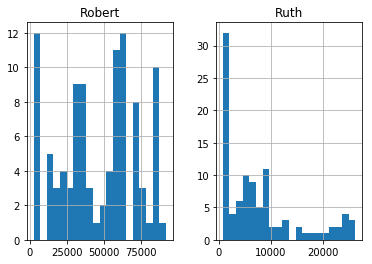

In [330]:
task1.hist(bins=int(100/5))

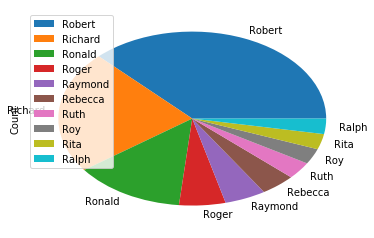

In [331]:
r = get_year(1950)
task3 = r[r.Name.str.startswith('R')].sort_values('Count', ascending=False).head(10)
task3.set_index(task3['Name'], inplace=True)
task3.plot.pie(y='Count')

In [332]:
name_dynamics.reset_index(inplace=True)

In [333]:
def calc(str):
    count = 0
    euioa = set("euioaEUIOA")
    for letter in str:
        if letter not in euioa:
            count += 1
    return count

In [334]:
# century.reset_index(inplace=True)
# century['Summa'] = century['Count'].groupby(century['Name']).transform('sum')
# sums = century[['Name', 'Summa']].sort_values('Name', ascending=True)
# sums
# century
# test = century.groupby('Name').sum()
# test
# name_data = name_dynamics[['Name', 'Count']]
# name_dynamics
counts = name_dynamics.groupby(by='Name')['Count'].sum()
# test.reset_index(inplace=True)
consonants = pd.DataFrame(counts)
consonants.reset_index(inplace=True)
consonants['Cons'] = consonants.apply(lambda row: calc(row['Name']), axis=1)


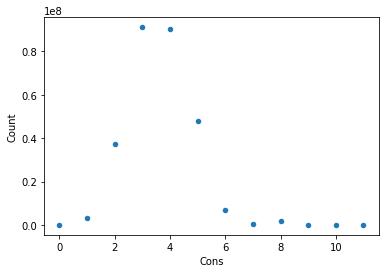

In [335]:
task4 = consonants[['Cons', 'Count']].groupby(by='Cons').sum()
task4.reset_index(inplace=True)
task4.plot.scatter(x='Cons', y='Count')